In [1]:
# cnn model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import keras
import sklearn
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
try: from sklearn.model_selection import train_test_split
except: from sklearn.cross_validation import train_test_split
import pandas as pd
import numpy as np
from sklearn import datasets
import sys
sys.path.insert(0,'..')

from time import time
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [2]:
def evaluate(y_test,m):
    #evaluate results
    mse=sklearn.metrics.mean_squared_error(y_test,m)
    mabs=sklearn.metrics.mean_absolute_error(y_test,m)
    exvar=sklearn.metrics.explained_variance_score(y_test,m)   
    print('Mean Squa Error :',mse)
    print('Mean Abso Error :',mabs)
    print('Expl. Variance  :',exvar,'\n')

### Read the train & test and preprocessing

In [3]:
# load data
import pandas as pd
# load data
df=pd.read_csv('airfoil_self_noise.dat', sep="\t", header=None)
# del df['Date']
# del df['Next_Tmax'] #Next_Tmin
# drop nan 
df = df.dropna()
# the head of df
df.head()

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [4]:
# df to values
df = df.values
Y = df[:,5]
X = df[:,0:5]



In [5]:
from sklearn.preprocessing import MinMaxScaler
   
minmaxscale = MinMaxScaler().fit(X)
X = minmaxscale.transform(X)

In [6]:
X = X.reshape(X.shape[0], X.shape[1], 1)
print(X.shape)

x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.2, random_state=1) 
x_train_, x_test_, y_train_, y_test_ = x_train, x_test, y_train, y_test

(1503, 5, 1)


In [7]:
def standardize(train, test):

    mean = np.mean(train, axis=0)
    std = np.std(train, axis=0)+0.000001

    X_train = (train - mean) / std
    X_test = (test - mean) /std
    return X_train, X_test

x_train, x_test = standardize(x_train, x_test)

In [8]:
x_test.shape

(301, 5, 1)

In [9]:
# print(np.any(np.isnan(X_test)))
# print(np.any(np.isnan(y_test)))

### Creation structure of CNN

In [10]:
# build CNN
def CNN_net():
    
    model = Sequential()
    model.add(Conv1D(64, 3, activation="relu", input_shape=(X.shape[1],1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.5))
    
#     model.add(Conv1D(128, 3, activation='relu'))
#     model.add(MaxPooling1D(pool_size=2))
#     model.add(Dropout(0.5))    
    
    
    model.add(Flatten())
    #model.add(Dense(64, activation="relu"))
    model.add(Dense(1))
    model.compile(loss="mse", optimizer="adam")
    
    return model

In [11]:
# Parametres
verbose, epochs, batch_size = 1, 250, 5
# initialize the model object
clf_cnn = CNN_net()
# fit network #Train the model using tensorboard instance in the callbacks
history = clf_cnn.fit(x_train, y_train, batch_size=batch_size,
          epochs=epochs, verbose=verbose, validation_data=(x_test, y_test))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Train on 1202 samples, validate on 301 samples
Epoch 1/250
1202/1202 [==============================] - 1s 530us/step - loss: 14530.6863 - val_loss: 12959.7035
Epoch 2/250
1202/1202 [==============================] - 1s 420us/step - loss: 10432.9047 - val_loss: 7723.7247
Epoch 3/250
1202/1202 [==============================] - 1s 597us/step - loss: 5354.5393 - val_loss: 3397.6051
Epoch 4/250
1202/1202 [==============================] - 0s 342us/step - loss: 2542.4856 - val_loss: 1760.5966
Epoch 5/250
1202/1202 [==============================] - 0s 379us/step - loss: 1731.2499 - val_loss: 1244.8048
Epoch 6/250
1202/1202 [==============================] - 0s 400us/step - loss: 1434.3963 - val_loss: 983.3095
Epoch 7/250
1202/1202 [==============================] - 0s 328us/step - loss: 1161.1874 - val_loss: 800.3178
Epoch 8/250
1202/1202 [==============================] - 0s 319us/step - loss: 1046.8369 - v

1202/1202 [==============================] - 1s 435us/step - loss: 366.7637 - val_loss: 35.2375
Epoch 68/250
1202/1202 [==============================] - 0s 406us/step - loss: 376.1114 - val_loss: 39.2990
Epoch 69/250
1202/1202 [==============================] - 0s 388us/step - loss: 343.2308 - val_loss: 37.9596
Epoch 70/250
1202/1202 [==============================] - 0s 364us/step - loss: 347.1729 - val_loss: 37.9735
Epoch 71/250
1202/1202 [==============================] - 0s 400us/step - loss: 354.1286 - val_loss: 33.6125
Epoch 72/250
1202/1202 [==============================] - 0s 371us/step - loss: 344.3728 - val_loss: 36.5202
Epoch 73/250
1202/1202 [==============================] - 0s 347us/step - loss: 364.0416 - val_loss: 37.8687
Epoch 74/250
1202/1202 [==============================] - 0s 338us/step - loss: 382.1583 - val_loss: 45.1129
Epoch 75/250
1202/1202 [==============================] - 0s 334us/step - loss: 340.9646 - val_loss: 39.1620
Epoch 76/250
1202/1202 [========

Epoch 142/250
1202/1202 [==============================] - 0s 343us/step - loss: 338.6674 - val_loss: 36.3590
Epoch 143/250
1202/1202 [==============================] - 0s 336us/step - loss: 314.6984 - val_loss: 35.2758
Epoch 144/250
1202/1202 [==============================] - 0s 353us/step - loss: 339.5994 - val_loss: 37.3860
Epoch 145/250
1202/1202 [==============================] - 0s 397us/step - loss: 335.3253 - val_loss: 40.3482
Epoch 146/250
1202/1202 [==============================] - 0s 415us/step - loss: 298.4391 - val_loss: 48.3715
Epoch 147/250
1202/1202 [==============================] - 0s 389us/step - loss: 319.6947 - val_loss: 33.4070
Epoch 148/250
1202/1202 [==============================] - 0s 384us/step - loss: 326.7222 - val_loss: 33.8028
Epoch 149/250
1202/1202 [==============================] - 1s 501us/step - loss: 331.9539 - val_loss: 36.6278
Epoch 150/250
1202/1202 [==============================] - 1s 481us/step - loss: 314.2574 - val_loss: 36.9191
Epoch 151/

1202/1202 [==============================] - 0s 374us/step - loss: 309.3351 - val_loss: 35.1577
Epoch 217/250
1202/1202 [==============================] - 0s 369us/step - loss: 300.4085 - val_loss: 35.9414
Epoch 218/250
1202/1202 [==============================] - 0s 387us/step - loss: 297.6098 - val_loss: 34.9157
Epoch 219/250
1202/1202 [==============================] - 0s 373us/step - loss: 287.7887 - val_loss: 35.6162
Epoch 220/250
1202/1202 [==============================] - 0s 368us/step - loss: 299.0950 - val_loss: 35.6732
Epoch 221/250
1202/1202 [==============================] - 0s 374us/step - loss: 283.3061 - val_loss: 35.1055
Epoch 222/250
1202/1202 [==============================] - 0s 377us/step - loss: 295.1107 - val_loss: 41.5673
Epoch 223/250
1202/1202 [==============================] - 0s 373us/step - loss: 302.9222 - val_loss: 30.6112
Epoch 224/250
1202/1202 [==============================] - 0s 405us/step - loss: 308.1000 - val_loss: 33.9804
Epoch 225/250
1202/1202 

In [12]:
ypred = clf_cnn.predict(x_test)

print(" Model.evaluate : ",clf_cnn.evaluate(x_train, y_train),'\n')

#evaluate results
mse=sklearn.metrics.mean_squared_error(y_test,ypred)
mabs=sklearn.metrics.mean_absolute_error(y_test,ypred)
exvar=sklearn.metrics.explained_variance_score(y_test,ypred)   
print('Mean Squa Error :',mse)
print('Mean Abso Error :',mabs)
print('Expl. Variance  :',exvar)

1202/1202 [==============================] - 0s 30us/step
 Model.evaluate :  36.329156631241226 

Mean Squa Error : 33.65552434291699
Mean Abso Error : 4.764523396945078
Expl. Variance  : 0.2984487739666838


In [13]:
clf_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 3, 64)             256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 64)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 64)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


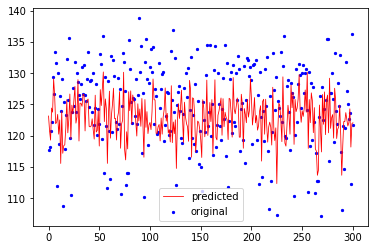

In [14]:
#https://www.datatechnotes.com/2019/12/how-to-fit-regression-data-with-cnn.html
x_ax = range(len(ypred))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

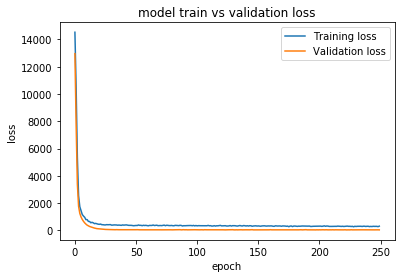

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training loss','Validation loss'], loc='best')
plt.show()

### Testing the Novel Approach

### Feature Extraction by CNN

In [16]:
from keras.models import Model
# from the first Fully-Connected layer 
layer_name = 'dense_1'
intermediate_layer_model = Model(inputs=clf_cnn.input,
                                 outputs=clf_cnn.get_layer(layer_name).output)

In [17]:
# Save the features of the train dataset to use it in future.
out_cnn_train = intermediate_layer_model.predict(x_train)
# Save the features of the test dataset to use it in future.
out_cnn_test = intermediate_layer_model.predict(x_test)

In [18]:
print('Training Features (from CNN) Shape:', out_cnn_train.shape)
print('Training Labels (from CNN) Shape:', y_train.shape,'\n')

print('Test Features (from CNN) Shape:', out_cnn_test.shape)
print('Test Labels (from CNN) Shape:', y_test.shape,'\n')

print('Test Features original Shape:', x_train_.shape)
print('Test Features original Shape:', x_test_.shape)

Training Features (from CNN) Shape: (1202, 1)
Training Labels (from CNN) Shape: (1202,) 

Test Features (from CNN) Shape: (301, 1)
Test Labels (from CNN) Shape: (301,) 

Test Features original Shape: (1202, 5, 1)
Test Features original Shape: (301, 5, 1)


### Classification by CNN + Random Forest + MLP

In [19]:
from djinn import djinn
print("djinn example")    
modelname="reg_djinn_test"   # name the model
ntrees=1                 # number of trees = number of neural nets in ensemble
maxdepth=5               # max depth of tree -- optimize this for each data set
dropout_keep=1.0         # dropout typically set to 1 for non-Bayesian models

#initialize the model
model=djinn.DJINN_Regressor(ntrees,maxdepth,dropout_keep)
x_train, y_train, x_test, y_test = out_cnn_train, y_train, out_cnn_test, y_test

# find optimal settings: this function returns dict with hyper-parameters
# each djinn function accepts random seeds for reproducible behavior
optimal=model.get_hyperparameters(x_train, y_train, random_state=42)
batchsize=optimal['batch_size']
learnrate=optimal['learn_rate']
epochs=optimal['epochs']

# batchsize=304
# learnrate=0.002474296684203603
# epochs=210
 
# train the model with hyperparameters determined above
model.train(x_train,y_train,epochs=epochs,learn_rate=learnrate, batch_size=batchsize, 
              display_step=1, save_files=True, file_name=modelname, 
              save_model=True,model_name=modelname, random_state=1)

# *note there is a function model.fit(x_train,y_train, ... ) that wraps 
# get_hyperparameters() and train(), so that you do not have to manually
# pass hyperparameters to train(). However, get_hyperparameters() can
# be expensive, so I recommend running it once per dataset and using those
# hyperparameter values in train() to save computational time

# make predictions
m=model.predict(x_test) #returns the median prediction if more than one tree

#evaluate results
evaluate(y_test,m)

#close model 
model.close_model()

djinn example
Finding optimal hyper-parameters...
Determining learning rate...


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Determining number of epochs needed...



Optimal learning rate:  0.0007399558105791465
Optimal # epochs:  210
Optimal batch size:  61



Epoch: 0001 cost= 0.060166229
Epoch: 0002 cost= 0.035428790
Epoch: 0003 cost= 0.031972939
Epoch: 0004 cost= 0.029127313
Epoch: 0005 cost= 0.026193128
Epoch: 0006 cost= 0.028186298
Epoch: 0007 cost= 0.027958144
Epoch: 0008 cost= 0.026032179
Epoch: 0009 cost= 0.024997249
Epoch: 0010 cost= 0.027814652
Ep

Model saved in: ./reg_djinn_test_tree0.ckpt

INFO:tensorflow:Restoring parameters from ./reg_djinn_test_tree0.ckpt
Model 0 restored
Mean Squa Error : 29.995753247390187
Mean Abso Error : 4.485469323649358
Expl. Variance  : 0.29433416349650365 



### Classification by CNN + ( SVM, XGB, DTree, ExtraTrees, RandomFores)


In [20]:
#https://stackoverflow.com/questions/41925157/logisticregression-unknown-label-type-continuous-using-sklearn-in-python
import numpy as np
from sklearn import linear_model
from sklearn import svm

classifiers = [
    svm.SVR(gamma='scale'),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()
              ]

for item in classifiers:
    print(item,'\n')
    clf = item
    clf.fit(out_cnn_train, y_train)
    #print(clf.predict(predictionData),'\n')
    #Feed the features of the test to ExtraTreesClassifier Classifier to predict its class
    m = clf.predict(out_cnn_test)
    #evaluate results
    mse=sklearn.metrics.mean_squared_error(y_test,m)
    mabs=sklearn.metrics.mean_absolute_error(y_test,m)
    exvar=sklearn.metrics.explained_variance_score(y_test,m)   
    print('Mean Squa Error :',mse)
    print('Mean Abso Error :',mabs)
    print('Expl. Variance  :',exvar,'\n')
    print("================================================================================")

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) 

Mean Squa Error : 27.43459009249709
Mean Abso Error : 4.218852631388756
Expl. Variance  : 0.3605612271406058 

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False) 

Mean Squa Error : 3.8242203598467585e+25
Mean Abso Error : 6181778822599.152
Expl. Variance  : -6.548551082175998e+20 

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=0.001, verbose=False) 

Mea

In [21]:
#Feed the extracted features with the labels to RANDOM FOREST 
from xgboost import XGBRegressor
XGBModel = XGBRegressor()
XGBModel.fit(out_cnn_train, y_train , verbose=False)
# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(out_cnn_test)
print('CNN XGBRegressor      ')
evaluate(y_test,XGBpredictions)

    
from sklearn.ensemble import ExtraTreesRegressor
Ext = ExtraTreesRegressor(n_estimators=10)
Ext.fit(out_cnn_train, y_train)
#Feed the features of the test to ExtraTreesClassifier Classifier to predict its class
predictionsCNN_Ext = Ext.predict(out_cnn_test)
print('CNN ExtraTreesRegressor      ')
evaluate(y_test,predictionsCNN_Ext)


from sklearn import tree
clf_dt = tree.DecisionTreeRegressor()
clf_dt.fit(out_cnn_train, y_train)
# Get the mean absolute error on the validation data :
clf_dtpredictions = clf_dt.predict(out_cnn_test)
print('CNN DecisionTreeRegressor      ')
evaluate(y_test,clf_dtpredictions)

CNN XGBRegressor      
Mean Squa Error : 32.363865494011144
Mean Abso Error : 4.556666892016844
Expl. Variance  : 0.2380583429793891 

CNN ExtraTreesRegressor      
Mean Squa Error : 48.471269272790686
Mean Abso Error : 5.5103504983388705
Expl. Variance  : -0.14111401799449075 

CNN DecisionTreeRegressor      
Mean Squa Error : 56.08787118604649
Mean Abso Error : 5.934581395348836
Expl. Variance  : -0.31945441598538404 



In [22]:
out_cnn_train.shape

(1202, 1)

###  MLP

In [23]:
# Regression Example With Boston Dataset: Baseline
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.wrappers.scikit_learn import KerasClassifier


def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(128, input_dim=out_cnn_train.shape[1], kernel_initializer='normal', activation='relu'))
	model.add(Dense(64, activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model


clf_MLP = KerasClassifier(build_fn = baseline_model, epochs = 50, batch_size=5, verbose=1)
clf_MLP.fit(out_cnn_train, y_train)
y_predmlp = clf_MLP.predict(out_cnn_test)

#print("CNN MLP Model.evaluate : ",clf_MLP.evaluate(out_cnn_test, y_train),'\n')
#evaluate results
mse=sklearn.metrics.mean_squared_error(y_test,y_predmlp)
mabs=sklearn.metrics.mean_absolute_error(y_test,y_predmlp)
exvar=sklearn.metrics.explained_variance_score(y_test,y_predmlp)   
print('CNN MLP Mean Squa Error :',mse)
print('CNN MLP Mean Abso Error :',mabs)
print('CNN MLP Expl. Variance  :',exvar)



Epoch 1/50
1202/1202 [==============================] - 1s 469us/step - loss: 196838.5209
Epoch 2/50
1202/1202 [==============================] - 0s 332us/step - loss: 107652.8947
Epoch 3/50
1202/1202 [==============================] - 0s 299us/step - loss: 107955.5370
Epoch 4/50
1202/1202 [==============================] - 0s 311us/step - loss: 107928.3003
Epoch 5/50
1202/1202 [==============================] - 0s 282us/step - loss: 108202.1374
Epoch 6/50
1202/1202 [==============================] - 0s 304us/step - loss: 108313.3902
Epoch 7/50
1202/1202 [==============================] - 0s 333us/step - loss: 108553.0353
Epoch 8/50
1202/1202 [==============================] - 0s 288us/step - loss: 109278.6692
Epoch 9/50
1202/1202 [==============================] - 0s 325us/step - loss: 108378.8933
Epoch 10/50
1202/1202 [==============================] - 0s 295us/step - loss: 107722.4198
Epoch 11/50
1202/1202 [==============================] - 0s 314us/step - loss: 108065.0430
Epoch 

### Classification by RandomForest, ExtraTrees, XGBRegressor

In [24]:
x_train_ = x_train_.reshape(x_train_.shape[0], x_train_.shape[1])
x_test_  = x_test_.reshape(x_test_.shape[0], x_test_.shape[1])

In [25]:
# RandomForestClassifier : from dataset originl
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train_, y_train_)
predictions = rf.predict(x_test_)
print(' RandomForestRegressor      ')
evaluate(y_test_,predictions)


#Feed the extracted features with the labels to RANDOM FOREST 
from xgboost import XGBRegressor
XGBModel = XGBRegressor()
XGBModel.fit(x_train_, y_train_ , verbose=False)
# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(x_test_)
print(' XGBRegressor      ')
evaluate(y_test_,XGBpredictions)

    
from sklearn.ensemble import ExtraTreesRegressor
Ext = ExtraTreesRegressor(n_estimators=10)
Ext.fit(x_train_, y_train_)
#Feed the features of the test to ExtraTreesClassifier Classifier to predict its class
predictionsCNN_Ext = Ext.predict(x_test_)
print(' ExtraTreesRegressor      ')
evaluate(y_test_,predictionsCNN_Ext)

 RandomForestRegressor      
Mean Squa Error : 2.431353182168442
Mean Abso Error : 1.1421651495016674
Expl. Variance  : 0.9442639588694615 

 XGBRegressor      
Mean Squa Error : 2.149974348789351
Mean Abso Error : 1.0521050820588274
Expl. Variance  : 0.9493874100580102 

 ExtraTreesRegressor      
Mean Squa Error : 2.3082564065780766
Mean Abso Error : 1.0908684385382053
Expl. Variance  : 0.9469680086085129 

